In [ ]:
%matplotlib inline
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.decomposition import PCA

In [ ]:
train_set = pd.read_csv('../train.csv', parse_dates=['srch_ci', 'srch_co'])

In [ ]:
train_set.describe()

In [ ]:
users_group = train_set.groupby('user_id')
bookings = users_group.aggregate({'is_booking':np.sum})
print np.sum(bookings)

## Get the top 100000 users with most transactions

In [ ]:
filtered_user_ids_1k = list(train_set['user_id'].value_counts()[0:1000].index)

In [ ]:
filtered_user_ids_10k = list(train_set['user_id'].value_counts()[0:10000].index)

In [ ]:
filtered_user_ids_100k = list(train_set['user_id'].value_counts()[0:100000].index)

In [ ]:
train_set['user_id'].value_counts()[0:10000].tail(5)

In [ ]:
filtered_train_set_1k = train_set[train_set['user_id'].isin(filtered_user_ids_1k)]

In [ ]:
filtered_train_set_10k = train_set[train_set['user_id'].isin(filtered_user_ids_10k)]

In [ ]:
filtered_train_set_100k = train_set[train_set['user_id'].isin(filtered_user_ids_100k)]

In [ ]:
filtered_train_set_10k.describe()

In [ ]:
filtered_train_set_10k['srch_ci'] = pd.to_datetime(filtered_train_set_10k['srch_ci'])
filtered_train_set_10k['srch_co'] = pd.to_datetime(filtered_train_set_10k['srch_co'])

In [ ]:
temp = pd.to_datetime(filtered_train_set_10k['srch_ci'],errors = 'ignore')
filtered_train_set_10k['srch_ci'] = temp
temp = pd.to_datetime(filtered_train_set_10k['srch_co'],errors = 'ignore')
filtered_train_set_10k['srch_co'] = temp

In [ ]:
filtered_train_set_10k['num_days'] = (filtered_train_set_10k['srch_co'] - filtered_train_set_10k['srch_ci'])\
                                                            .values.astype('timedelta64[D]').astype(int)

In [ ]:
filtered_train_set_10k['num_days'] = filtered_train_set_10k['num_days'].apply(lambda x: abs(x))

In [ ]:
filtered_train_set_1k ['num_days'] = \
 (filtered_train_set_1k['srch_co'] - filtered_train_set_1k['srch_ci']).values.astype('timedelta64[D]').astype(int)

In [ ]:
erroneous = filtered_train_set_10k[filtered_train_set_10k['num_days'] < 0]
len(erroneous)

In [ ]:
filtered_train_set_10k = filtered_train_set_10k[filtered_train_set_10k['num_days'] >= 0] 

In [ ]:
temp = pd.to_datetime(train_set['srch_ci'],errors = 'coerce')
train_set['srch_ci'] = temp
temp = pd.to_datetime(train_set['srch_co'],errors = 'coerce')
train_set['srch_co'] = temp

In [ ]:
train_set['num_days'] = (train_set['srch_co'] - train_set['srch_ci'])\
                                                            .values.astype('timedelta64[D]').astype(int)

In [ ]:
temp = pd.to_datetime(test_data['srch_ci'],errors = 'coerce')
test_data['srch_ci'] = temp
temp = pd.to_datetime(test_data['srch_co'],errors = 'coerce')
test_data['srch_co'] = temp

In [ ]:
test_data['num_days'] = (test_data['srch_co'] - test_data['srch_ci'])\
                                                            .values.astype('timedelta64[D]').astype(int)

In [ ]:
filtered_train_set_10k = filtered_train_set_10k.drop('hours_to_checkin',axis=1)

In [ ]:
filtered_train_set_10k['date_time'] = pd.to_datetime(filtered_train_set_10k["date_time"])

In [ ]:
filtered_train_set_10k['num_days_to_checkin'] = \
            (filtered_train_set_10k['srch_ci'] - filtered_train_set_10k['date_time'])\
                            .values.astype('timedelta64[D]').astype(int)

In [ ]:
(filtered_train_set_10k['num_days_to_checkin'] < 0).sum()

In [ ]:
filtered_train_set_10k['num_days_to_checkin'].describe()

In [ ]:
filtered_train_set_10k['num_days'] = filtered_train_set_10k['num_days'].apply(lambda x: abs(x))

In [ ]:
filtered_train_set_10k['month'] = filtered_train_set_10k['date_time'].apply(lambda x: x.month)

In [ ]:
len(filtered_train_set_10k)

In [ ]:
filtered_train_set_10k = filtered_train_set_10k[filtered_train_set_10k['num_days_to_checkin']<366]
print len(filtered_train_set_10k)

In [ ]:
filtered_train_set_10k = filtered_train_set_10k[filtered_train_set_10k['num_days'] < 365]

In [ ]:
filtered_train_set_10k = filtered_train_set_10k.dropna()

In [ ]:
filtered_train_set_10k['log2_orig_destination_distance'] = \
                ((np.log2(filtered_train_set_10k['orig_destination_distance'])).round() + 7)

In [ ]:
print filtered_train_set_10k['log2_orig_destination_distance'].hist()
print len(filtered_train_set_10k)

In [ ]:
filtered_train_set_10k['log1p_num_days_to_checkin'] = \
            (np.log1p(filtered_train_set_10k['num_days_to_checkin'])*10).round()

In [ ]:
filtered_train_set_10k['log1p_num_days'] =  \
            ((np.log1p(filtered_train_set_10k['num_days']))*10).round()

## PCA Model - destinations.csv

In [ ]:
destinations = pd.read_csv('../destinations.csv')
cols = list(destinations.columns)
cols.remove('srch_destination_id')
destinations[cols] = (destinations[cols] - destinations[cols].mean())/(destinations[cols].max() - destinations[cols].min())
destinations.describe()

In [ ]:
pca = PCA(n_components=3)
dest_small = pca.fit_transform(destinations[["d{0}".format(i + 1) for i in range(149)]])
dest_small = pd.DataFrame(dest_small,columns=['dest1','dest2','dest3'])
dest_small["srch_destination_id"] = destinations["srch_destination_id"]

In [ ]:
np.sum(pca.explained_variance_ratio_)

In [ ]:
dest_small.head()

In [ ]:
dat = filtered_train_set_10k[:100]
dat.info()

In [ ]:
dummy = pd.merge(filtered_train_set_10k,dest_small,on = 'srch_destination_id')
#print dummy.head()

In [ ]:
dummy.info()

In [ ]:
filtered_train_set_10k = pd.DataFrame(dummy)

In [ ]:
filtered_train_set_10k.to_csv('../Top_10k_users.csv.gzip',compression='gzip',index=False)

In [ ]:
len(filtered_train_set_1k)

In [ ]:
shortlist_users =[]
for c in user_id_100:
    print c
    break
    if c == 1:
        shortlist_users.append()
print shortlist_users

In [ ]:
test_set = pd.read_csv('test.csv')

In [ ]:
test_set.info()

# Top 10000 Users

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import naive_bayes
import operator
from pprint import pprint
from sklearn.decomposition import PCA
import time
from multiprocessing.dummy import Pool as ThreadPool 

In [80]:
filtered_data = pd.read_csv('../Top_10k_users.csv')

In [ ]:
#test_data = pd.read_csv('../test.csv')

In [ ]:
#destinations_data = pd.read_csv('../destinations.csv')

## Randomly permute data before proceeding further and filter users 

In [81]:
s = filtered_data['user_id'].value_counts()
users_records_10 = s[s >= 10].index

In [82]:
print users_records_10

Int64Index([1187360,  783124,   96700,  685462,   42680, 1011295,   52390,
             734404,   73437, 1067676,
            ...
            1131265,  312984,  770891,   52878,  559098,  381135,  453337,
             919526,  870282,  210530],
           dtype='int64', length=7221)


In [85]:
filtered_data = filtered_data[filtered_data['user_id'].isin(users_records_10)]
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682116 entries, 0 to 1684468
Data columns (total 33 columns):
date_time                         1682116 non-null object
site_name                         1682116 non-null int64
posa_continent                    1682116 non-null int64
user_location_country             1682116 non-null int64
user_location_region              1682116 non-null int64
user_location_city                1682116 non-null int64
orig_destination_distance         1682116 non-null float64
user_id                           1682116 non-null int64
is_mobile                         1682116 non-null int64
is_package                        1682116 non-null int64
channel                           1682116 non-null int64
srch_ci                           1682116 non-null object
srch_co                           1682116 non-null object
srch_adults_cnt                   1682116 non-null int64
srch_children_cnt                 1682116 non-null int64
srch_rm_cnt                

In [86]:
filtered_data = filtered_data.iloc[np.random.permutation(len(filtered_data))]

In [95]:
filtered_data[:1000000]['user_id'].value_counts()

1187360    294
42680      291
1011295    289
783124     288
96700      283
73437      282
734404     279
685462     271
53913      270
574653     270
946838     269
1025243    268
64773      267
52390      266
732273     264
1175659    264
890273     262
526472     262
31613      259
261678     258
158459     258
735853     258
561327     257
1156294    257
1016190    257
736180     257
780534     257
91830      256
1173495    256
840844     255
          ... 
1103108      5
338617       5
353460       5
897655       5
448987       5
105790       5
398323       5
815860       5
52878        4
1169135      4
920258       4
829258       4
1162142      4
123011       4
432710       4
773638       4
502145       4
1048236      4
1181010      4
1015171      4
647455       4
241707       4
511568       4
940938       4
919526       4
794837       4
1004581      4
856462       3
453337       3
112715       3
Name: user_id, dtype: int64

In [87]:
X_columns = filtered_data.columns

In [88]:
X_columns = X_columns.drop(['hotel_cluster','date_time','srch_ci','srch_co','dest1','dest2','dest3','is_booking']).astype(list)
print X_columns

Index([u'site_name', u'posa_continent', u'user_location_country',
       u'user_location_region', u'user_location_city',
       u'orig_destination_distance', u'user_id', u'is_mobile', u'is_package',
       u'channel', u'srch_adults_cnt', u'srch_children_cnt', u'srch_rm_cnt',
       u'srch_destination_id', u'srch_destination_type_id', u'cnt',
       u'hotel_continent', u'hotel_country', u'hotel_market', u'num_days',
       u'num_days_to_checkin', u'month', u'log2_orig_destination_distance',
       u'log1p_num_days_to_checkin', u'log1p_num_days'],
      dtype='object')


In [5]:
def content_based_nbc (X,Y,X_test,Y_test):
    gnb = naive_bayes.GaussianNB()
    y_predict = gnb.fit(X,Y).predict(X_test)
    y_predict_pb = gnb.predict_proba(X_test)
    accuracy_top = 0.0
    Y_predicted_top = pd.DataFrame(columns=['cb_recommendations'])
    for i in range(len(y_predict_pb)):
        ordered ={}
        ordered['cb_recommendations'] =\
            sorted(zip (gnb.classes_,y_predict_pb[i]), key= operator.itemgetter(1),reverse=True)[0:5]
        Y_predicted_top = Y_predicted_top.append(ordered,ignore_index = True)
        accuracy_top += (Y_test[i] in dict(ordered['cb_recommendations']).keys())
        #break
        #print "From Top %s,%s,%s" %(ordered[0][0],y_predict[i],Y[i])
    '''%xdel gnb
    %xdel y_predict_pb
    %xdel y_predict
    %xdel ordered'''
    accuracy = (Y_test == y_predict).sum()*1.0
    #accuracy_top = accuracy_top*1.0/len(X_test)
    #print accuracy,accuracy_top
    return (accuracy,accuracy_top,Y_predicted_top)

In [6]:
print "Before dropping na", len(filtered_data)#, len(test_data)
#filtered_data['orig_destination_distance'] = filtered_data['orig_destination_distance'].fillna(-1)
filtered_data = filtered_data.dropna()
#test_data = test_data.dropna()
filtered_data = filtered_data.reset_index(drop=True)
#test_data = test_data.reset_index(drop=True)
print "After dropping na", len(filtered_data)#, len(test_data)
#filtered_data = filtered_data[filtered_data['num_days']>=0]

Before dropping na 1684469
After dropping na 1684469


In [ ]:
def get_recommendations(test_users_grouped):
    predictions = pd.DataFrame(columns=['id','hotel_cluster'])
    for user,filtered_test in test_users_grouped:
        try:
            filtered_train = train_grouped.get_group(user)
            
            filtered_train = filtered_train.fillna(0)
            filtered_train = filtered_train.reset_index(drop=True)

            filtered_test = filtered_test.fillna(0)
            filtered_test = filtered_test.reset_index(drop=True)

            X_train = filtered_train[columns]
            Y_train = filtered_train['hotel_cluster']
            X_test = filtered_test[columns]
            X_test_id = filtered_test['id'].astype(int)
            if len(X_train) < 1:
                print "No training data"
                continue
            if len(X_test) < 1:
                print "No test data"
                continue
            pred_dict = {}
            Y_predicted_top = content_based_nbc(X_train,Y_train,X_test)
            for i in range(len(X_test)):
                pred_dict['id'] = int(X_test_id[i])
                pred_dict['hotel_cluster'] = ' '.join([str(x) for x in Y_predicted_top[i]])
                predictions = predictions.append(pred_dict,ignore_index=True)
                #pprint(pred_dict)
            #pprint(Y_predicted_top)
            %xdel X_train
            %xdel X_test
            %xdel Y_train
            %xdel Y_predicted_top
        except ValueError as e:
            print e, user
    predictions.to_csv('predictions_group.csv',index=False)

In [90]:
users = filtered_data['user_id'].unique()
print len(users)

7221


In [98]:
def k_fold(filtered_data, k=5):
    accuracy = {}
    avg_accuracy = 0.0
    avg_accuracy_top = 0.0
    
    #users = filtered_data['user_id'].unique()
    filtered_with_recommendations = pd.DataFrame(columns =list(X_columns) + ['hotel_cluster','cb_recommendations'])
    #print len(users)
    filtered_data_grouped = filtered_data.groupby('user_id')
    print len(filtered_data_grouped)
    #for user in users:
    for user,filtered in filtered_data_grouped:
        try:
            filtered_with_recommendations_user = pd.DataFrame(columns =list(X_columns) + \
                                                              ['hotel_cluster','cb_recommendations'])
            '''filtered = filtered_data[filtered_data['user_id'] == user]

            filtered = filtered.dropna()'''
            filtered = filtered.reset_index(drop=True)
            
            fold_size = len(filtered)/k
            
            avg_accuracy_user = 0.0
            avg_accuracy_top_user = 0.0
            
            skipped_folds = 0
            for i in range(k):
                filtered_train = filtered[:fold_size*(i)].append(filtered[fold_size*(i+1):])
                filtered_test =  filtered[fold_size*(i):fold_size*(i+1)]
                
                filtered_train = filtered_train.reset_index(drop=True)
                filtered_test = filtered_test.reset_index(drop=True)
               
                X_train = filtered_train[X_columns]
                Y_train = filtered_train['hotel_cluster']
                
                X_test = filtered_test[X_columns]
                Y_test = filtered_test['hotel_cluster']
                
                #print X_train.shape, Y_train.shape
                #print X_test.shape, Y_test.shape
                #break
                
                if len(X_train) < 1:
                    skipped_folds +=1
                    #print fold_size, len(filtered)
                    #print "No training data"
                    continue
                if len(X_test) < 1:
                    skipped_folds +=1
                    #print fold_size, len(filtered)
                    #print "No test data"
                    continue
                
                acc,acc_top,Y_predicted_top = content_based_nbc(X_train,Y_train,X_test,Y_test)
                accuracy[user] = acc
                avg_accuracy_user += acc
                avg_accuracy_top_user += acc_top
            if k != skipped_folds:
                avg_accuracy += avg_accuracy_user*1.0/(k-skipped_folds)
                avg_accuracy_top += avg_accuracy_top_user*1.0/(k-skipped_folds)

            #break
        except ValueError as e:
            print e, user
    print avg_accuracy*1.0/len(users),avg_accuracy_top*1.0/len(users)

In [19]:
def get_cb_recommendations(train_set,test_set):
    accuracy = {}
    avg_accuracy = 0.0
    avg_accuracy_top = 0.0

    filtered_with_recommendations = pd.DataFrame(columns = list(X_columns) + ['hotel_cluster','cb_recommendations'])
    Y_predicted_top = pd.DataFrame(columns=['cb_recommendations'])
    #print len(users)
    train_set_grouped = train_set.groupby('user_id')
    test_set_grouped = test_set.groupby('user_id')
    
    for user,filtered_test in test_set_grouped:
        try:
            filtered_with_recommendations_user = pd.DataFrame(columns = list(X_columns) +\
                                                              ['hotel_cluster','cb_recommendations'])
            filtered_train = train_set_grouped.get_group(user)
            
            #filtered_train = filtered_train.dropna()
            filtered_train = filtered_train.reset_index(drop=True)

            #filtered_test = filtered_test.dropna()
            filtered_test = filtered_test.reset_index(drop=True)

            X_train = filtered_train[X_columns]
            Y_train = filtered_train['hotel_cluster']
            
            X_test = filtered_test[X_columns]
            Y_test = filtered_test['hotel_cluster']
            
            if len(X_train) < 1:
                print "No training data"
                continue
            if len(X_test) < 1:
                print "No test data"
                continue
            #return values from the NBC model
            acc,acc_top,Y_predicted_top = content_based_nbc(X_train,Y_train,X_test,Y_test)
            
            filtered_with_recommendations_user = pd.concat([X_test,Y_test,Y_predicted_top],axis=1)
            filtered_with_recommendations = \
                pd.concat([filtered_with_recommendations,filtered_with_recommendations_user],axis=0,ignore_index=True)
            #print len(X_test),len(Y_test),len(Y_predicted_top),len(filtered_with_recommendations)
            
            accuracy[user] = acc
            avg_accuracy += acc
            avg_accuracy_top += acc_top
            #break
        except ValueError as e:
            print e, user
            
    print avg_accuracy*1.0/len(filtered_with_recommendations)
    print avg_accuracy_top*1.0/len(filtered_with_recommendations)
    return filtered_with_recommendations

In [27]:
curr_time  = datetime.fromtimestamp(int(time.time()))
print curr_time

2016-05-11 19:18:53


In [28]:
filtered_data_with_recos = get_cb_recommendations(filtered_data,filtered_data)

0.377816985649
0.7800529425


In [48]:
filtered_data_with_recos = get_cb_recommendations(filtered_data[:1000],filtered_data[:1000])

0.77
0.956


In [100]:
k_fold(filtered_data)

7221


KeyboardInterrupt: 

In [29]:
print datetime.fromtimestamp(int(time.time())) - curr_time

2:03:31


In [39]:
(filtered_data['user_id'].value_counts() <= 5).sum()

423

In [31]:
filtered_data_with_recos.to_csv('../Top_10k_users_with_CB.csv.gzip',compression='gzip',index=False)

In [ ]:
X = filtered_data[filtered_data['user_id'] == users[0]][columns]
print len(X), len(filtered_data)

In [ ]:
gnb = naive_bayes.GaussianNB()
y_predict = gnb.fit(X,filtered_data[filtered_data['user_id'] == users[0]]['hotel_cluster']).predict(X)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d"\
      %(len(filtered_data),(filtered_data["hotel_cluster"]!= y_predict).sum()))

In [ ]:
print (filtered_data[filtered_data['user_id'] == users[0]]["hotel_cluster"]== y_predict).sum()*1.0/len(X)

In [ ]:
import operator

In [ ]:
pred = gnb.predict_proba(X)
print sorted(zip(gnb.classes_,pred[0]), key= operator.itemgetter(1),reverse=True)[0:5]
print y_predict[-1]

In [ ]:
y_top = []
for i in range(len(ordered)):
    y_top.append(ordered[i])
print y_top

In [ ]:
y_predict

In [ ]:
first_users = zip(ordered[0],pred[0][ordered[0]])[:-10:-1]

In [ ]:
a = 0.0
a += (ordered[0][-1] == 3)
print a

In [ ]:
zip(ordered[0],pred[0][ordered[0]])[::-1]

In [ ]:
a = 0
t = [1,2,3,4,5]
a += ([2] in t)
print a

In [ ]:
nan_values = filtered_data[pd.isnull(filtered_data).any(axis=1)]

In [ ]:
len(nan_values)

In [ ]:
for col in nan_values.columns:
    null_d = pd.isnull(nan_values[col])
    print col, null_d.sum()

In [ ]:
nan_values['num_days'].value_counts()

In [ ]:
d = filtered_data['orig_destination_distance']
d = d.dropna().astype(int)
print len(d)
print d.value_counts()

In [ ]:
sns.stripplot(d)

In [ ]:
print len(test_data['id'].unique())
print len(test_data['id'])

In [ ]:
filtered_data.info()

In [ ]:
plt.hist((np.log(filtered_data['orig_destination_distance'])), 
         bins = np.arange(min(np.log(filtered_data['orig_destination_distance'])),
                                            max(np.log(filtered_data['orig_destination_distance']))))

In [ ]:
orig =(filtered_data['orig_destination_distance'])

In [ ]:
orig = (orig - orig.mean())/(orig.max() - orig.min())

In [ ]:
(orig*1000).describe()

In [ ]:
((np.log2(filtered_data['orig_destination_distance'])).round() + 7).value_counts(normalize= True)

In [ ]:
filtered_data['num_days'].round(decimals=1).value_counts(normalize = True)

In [ ]:
((np.log10(filtered_data['num_days'])).round()).value_counts()

In [ ]:
p = plt.hist((filtered_data['num_days']))

In [152]:
def sqr(x):
    return x*x

In [160]:
d = datetime.fromtimestamp(time.time())

In [161]:
for i in range(10000000):
    sqr(i)

In [162]:
print datetime.fromtimestamp(time.time()) - d

0:00:02.068365


In [163]:
v = list(range(10000000))

In [164]:
d = datetime.fromtimestamp(time.time())

In [165]:
pool = ThreadPool(10)
j = pool.map(sqr,v)
pool.close() 
pool.join()

In [166]:
print datetime.fromtimestamp(time.time()) - d

0:00:02.558243


In [50]:
filtered_data['srch_destination_id'].value_counts()

8250     61648
8267     47581
8745     28089
8253     25673
8268     25445
8791     25409
8279     19100
8260     18407
7635     18043
11439    17351
8254     16643
12206    15931
8278     15320
8746     15030
11938    14119
8788     12367
8230     11828
12227    11419
8291     11026
11353    10506
8785      9511
12175     9335
5405      8889
12233     8884
8810      8195
8213      8140
669       7986
8824      7962
8223      7695
468       7282
         ...  
18551        1
37010        1
36237        1
1693         1
15004        1
56962        1
64670        1
42637        1
54427        1
57729        1
15005        1
11673        1
28311        1
234          1
9886         1
17043        1
56960        1
18069        1
32404        1
21910        1
11934        1
25740        1
31973        1
27879        1
19593        1
48779        1
30354        1
32403        1
5352         1
34556        1
Name: srch_destination_id, dtype: int64

In [56]:
from sklearn.neighbors import KernelDensity
def kde_plot(kernel, X, label, color="#aaaaff", bw = 1):
    #create the estimator:
    kde_X = KernelDensity(kernel=kernel, bandwidth=bw).fit(X)
    #setup range:
    range = np.linspace(X.min()-bw*3, X.max()+bw*3, 80)[:,np.newaxis]
    #print range
    #plot:
    plt.fill(range[:,0], np.exp(kde_X.score_samples(range)), fc=color, alpha=.6,label= label)
    dots = [y-np.random.rand()*.005 for y in np.zeros(len(X))] #all points, randomly jittered on the y axis
    plt.plot(X[:,0], dots, '+k', color=color)
    plt.legend(loc ='upper right')
    return kde_X

In [57]:
# Using Scott's Rule for BW estimation
d = 1
n = len(filtered_data)
kde_plot('gaussian', filtered_data['hotel_cluster'], 'Hotel','#aaaaff',n**(-1./(d+4)))

/Users/basavakanaparthi/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: query data dimension must match training data dimension

site_name


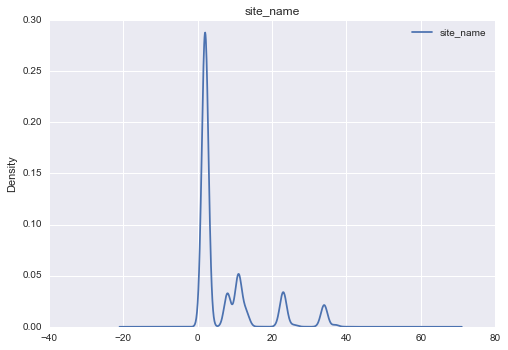

posa_continent


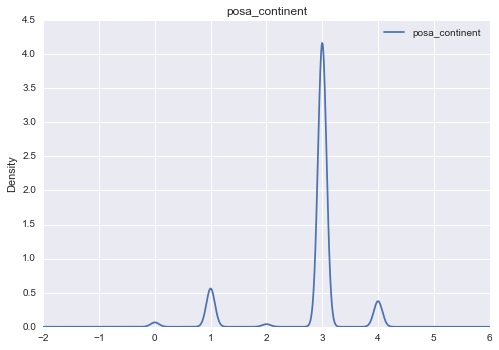

user_location_country


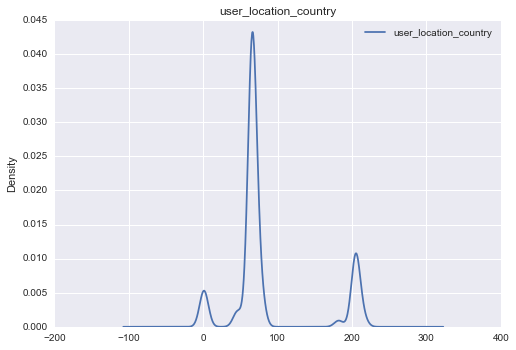

user_location_region


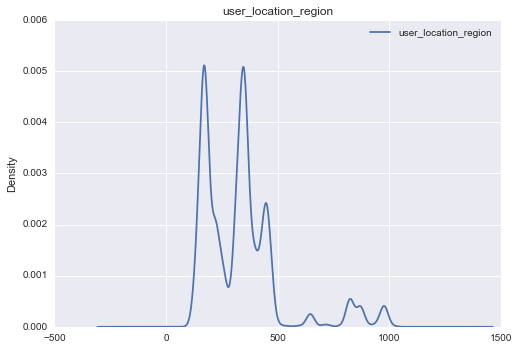

user_location_city


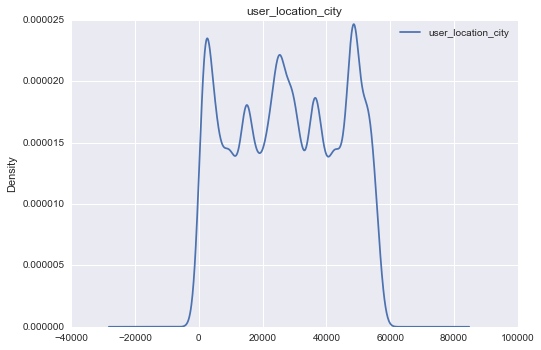

In [ ]:
for col in X_columns:
    try:
        k = filtered_data[col][:100000].plot(kind='kde',title = col,legend = True)
        print col
        plt.savefig(col +'.png')
        plt.show()
        #break
    except TypeError as e:
        print col
        continue